Our goal is to predict the probability of Rainfall based on the features at hand. The dataset is ordered by date, in an ascending order. 

The dataset has been obtained from the Australian Bureau of Meteorology. We have added an extra column to the existing dataset called 'Rain Tomorrow' which is the target variable. Below are the links to the dataset;

https://www.kaggle.com/filhypedeeplearning/2020-sydney-daily-weather-observations

http://www.bom.gov.au/climate/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import os
import glob

In [2]:
path = r'C:\Users\Geo\Downloads\2020 Sydney Daily Weather Observations'
files = glob.iglob(os.path.join(path, "*.csv")) 

df = pd.concat((pd.read_csv(file, index_col='Date', parse_dates=True, 
                            dayfirst=True, encoding='cp1250') for file in files)) 

Overview of the dataset.

In [3]:
df.head(3)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Rain Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,18.9,27.3,0.0,14.2,4.5,SSW,39.0,23:28,20.9,68.0,...,S,11,1015.0,24.9,60.0,5.0,ESE,24,1013.5,0.0
2020-01-02,19.3,29.0,0.0,7.2,5.3,SSW,35.0,23:02,22.6,64.0,...,ESE,17,1019.8,27.2,51.0,7.0,ESE,20,1017.4,0.0
2020-01-03,21.9,29.4,0.0,NaN,8.2,NE,43.0,16:22,24.1,79.0,...,WNW,9,1017.5,27.6,68.0,0.0,E,26,1012.5,0.0


The dataframe contains **366** rows, the total number of days in 2020 (leap year), and **21** distinct columns (excluding the 'Date' column). The 'Rain Tomorrow' column has been manually added in order to be used in our analysis.

In [4]:
print(df.shape)

(366, 21)


Let's have a look at the descriptive statistics of this dataframe. 

In [5]:
df.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),Rain Tomorrow
count,366.000000,364.000000,362.000000,356.000000,362.000000,365.000000,366.000000,365.000000,365.000000,366.000000,364.000000,364.000000,365.000000,366.000000,366.000000,365.000000
mean,14.670219,23.510714,4.285083,5.382865,6.525414,42.663014,17.531421,77.649315,4.526027,1018.417760,21.991758,60.728022,4.616438,19.598361,1016.027869,0.438356
std,4.354354,4.786657,13.519783,3.317315,4.020979,14.720617,4.456772,15.420757,2.812356,7.478648,4.737866,17.664775,2.689163,7.990741,7.517114,0.496867
min,6.200000,13.600000,0.000000,0.000000,0.000000,17.000000,8.100000,36.000000,0.000000,997.400000,10.500000,19.000000,0.000000,2.000000,992.200000,0.000000
25%,10.900000,19.700000,0.000000,3.000000,2.800000,31.000000,13.800000,67.000000,1.000000,1013.450000,18.600000,50.000000,2.000000,15.000000,1010.650000,0.000000
50%,14.800000,23.400000,0.000000,4.800000,7.600000,41.000000,17.950000,80.000000,6.000000,1018.650000,21.900000,60.500000,6.000000,19.000000,1016.500000,0.000000
75%,18.275000,26.500000,2.550000,7.200000,9.900000,50.000000,21.000000,90.000000,7.000000,1023.850000,24.900000,71.000000,7.000000,24.000000,1021.675000,1.000000
max,25.300000,41.200000,164.800000,25.400000,13.400000,106.000000,31.200000,100.000000,8.000000,1038.300000,40.800000,100.000000,8.000000,59.000000,1035.100000,1.000000


We can see on the above table that on average there were 6.5 hours of sunshine in Sydney across the whole year. The existence of **outliers** in some features can also be confirmed by looking at the descriptive statistics. For instance, in the Rainfall column we see that the mean is 4.28mm and that the maximum value is 164.8mm, which of course is way off the mean.

The total number of missing values of each column can be found below. The feature with the most missing values is 'Evaporation (mm)' with 10 NAs in total. Before further proceeding with our analysis, we need to find an appropriate way to handle the missing data. Since the dataset is small, it is preferable to not remove the NAs but rather impute them.

In [6]:
df.isna().sum()

Minimum temperature (°C)              0
Maximum temperature (°C)              2
Rainfall (mm)                         4
Evaporation (mm)                     10
Sunshine (hours)                      4
Direction of maximum wind gust        1
Speed of maximum wind gust (km/h)     1
Time of maximum wind gust             1
9am Temperature (°C)                  0
9am relative humidity (%)             1
9am cloud amount (oktas)              1
9am wind direction                    0
9am wind speed (km/h)                 0
9am MSL pressure (hPa)                0
3pm Temperature (°C)                  2
3pm relative humidity (%)             2
3pm cloud amount (oktas)              1
3pm wind direction                    0
3pm wind speed (km/h)                 0
3pm MSL pressure (hPa)                0
Rain Tomorrow                         1
dtype: int64

By using 'ffill' we are carrying the last observation forward thus replacing the NA value with it.

In [7]:
df = df.fillna(method='ffill')

## EDA

We can make some interesting observations by looking at the fluctuation of both the Maximum and Minimum temperatures across the whole year. It is noticable that they follow a similar trend and that there are a few outliers in the Maximum Temperature column that skew the mean upwards. We don't observe any extreme values in the other column though but we will verify this claim in the next plot.

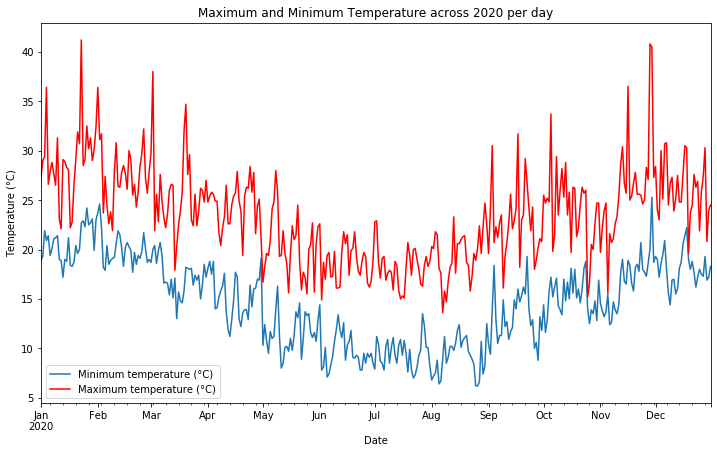

In [8]:
max_temp = df['Maximum temperature (°C)']
min_temp = df['Minimum temperature (°C)']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

In line with our expectations, the boxplot confirms the existence of outliers in the first variable, temperatures approximately over 37 degrees Celcius. There are no outliers observed in the 'Minimum temperature' feature though.

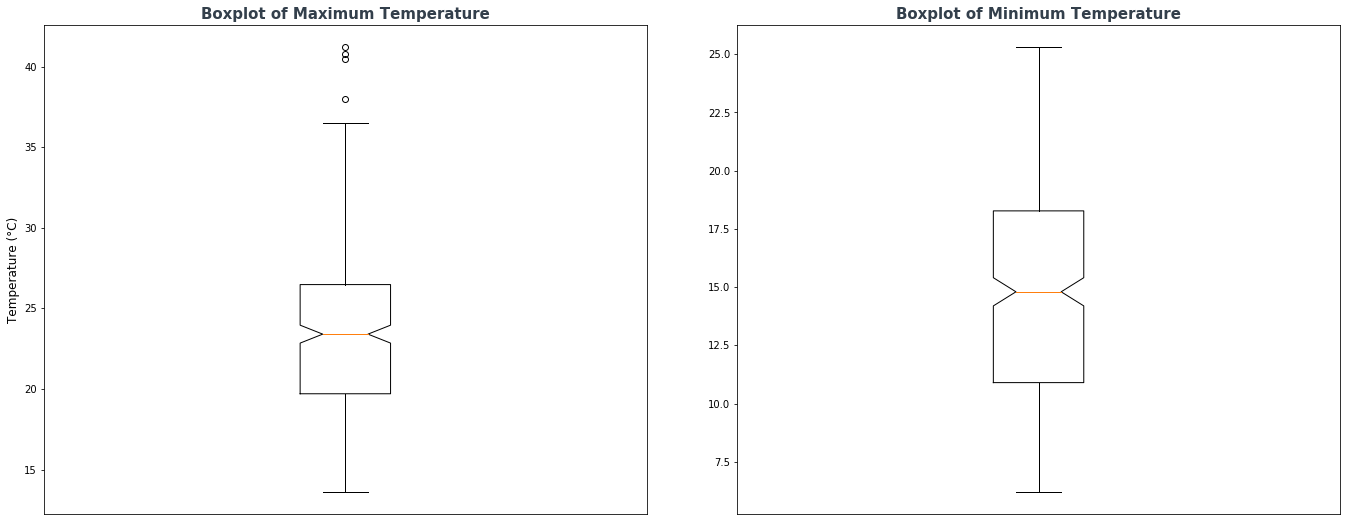

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,9), sharex=True)
ax1.boxplot(max_temp, notch=True)
ax1.set_title('Boxplot of Maximum Temperature', fontsize=15, fontweight='black', color='#333F4B')
ax1.set_ylabel('Temperature (°C)', fontsize=12)

#2nd plot
ax2.boxplot(min_temp, notch=True)
ax2.set_title('Boxplot of Minimum Temperature', fontsize=15, fontweight='black', color='#333F4B')
plt.subplots_adjust(left=7, right=9, wspace=0.15)
plt.xticks([])
plt.show()

But when were these extremely high temperatures recorded? 

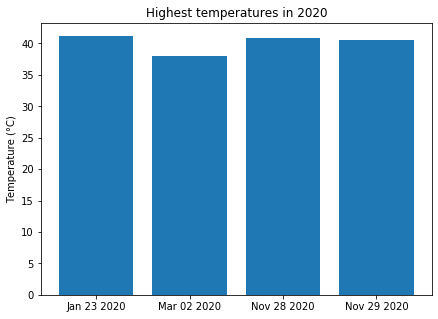

In [10]:
#subsetting the df
over_37 = max_temp[max_temp>37]
dates = over_37.index.strftime("%b %d %Y")

#barh plot
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(dates, over_37)
ax.set_title('Highest temperatures in 2020')
ax.set_ylabel('Temperature (°C)')
plt.show()

One of these values was captured in March which is at the beginning of Autumn in Australia.

Based on the descriptive statistics we checked earlier, the 9am MSL pressure (hPa) feature appeared to follow, to a certain extent, a normal distribution. We can verify that by plotting a histogram and drawing the line as below. 

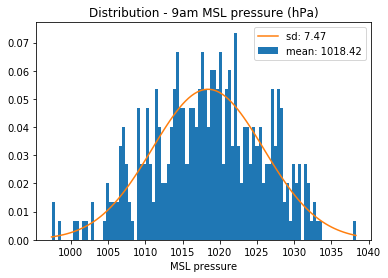

In [11]:
morning_msl_pressure = df['9am MSL pressure (hPa)']

n, bins, patches = plt.hist(morning_msl_pressure, 100, density=1)
mu = np.mean(morning_msl_pressure)
sigma = np.std(morning_msl_pressure)
plt.plot(bins, stats.norm.pdf(bins, mu, sigma))
plt.xlabel('MSL pressure')
plt.legend(['sd: ' + str(round(sigma, 2)), 'mean: ' + str(round(mu, 2))])
plt.title('Distribution - 9am MSL pressure (hPa)')
plt.show()

In [12]:
print('Mean:', round(morning_msl_pressure.median(), 3))
print('Median:', round(morning_msl_pressure.mean(), 3))

Mean: 1018.65
Median: 1018.418


We can visualize how many days it rained in the city in 2020. To begin with, we define a function to calculate the number of days it rained. We find that there was rainfall in **162** days, while there wasn't any in the remaining **204**.

In [13]:
def rain(col):
    rained, not_rained = 0, 0
    for i in col:
        if i!=0:
            rained+=1
        else:
            not_rained+=1
    return rained, not_rained

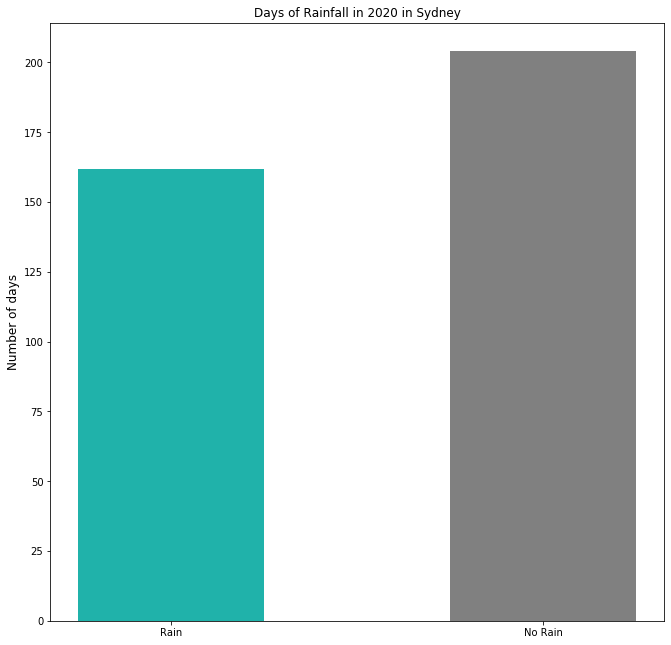

In [14]:
number_rain_days = [rain(df['Rainfall (mm)'])[0], rain(df['Rainfall (mm)'])[1]]

plt.figure(figsize=(11,11))
plt.bar(np.arange(0,2), number_rain_days, width=0.5, tick_label=('Rain', 'No Rain'),
        color=['lightseagreen','gray'])
plt.title('Days of Rainfall in 2020 in Sydney')
plt.ylabel('Number of days', fontsize=12)
plt.show()

It would be interesting to see the months with the most sunshine on average.

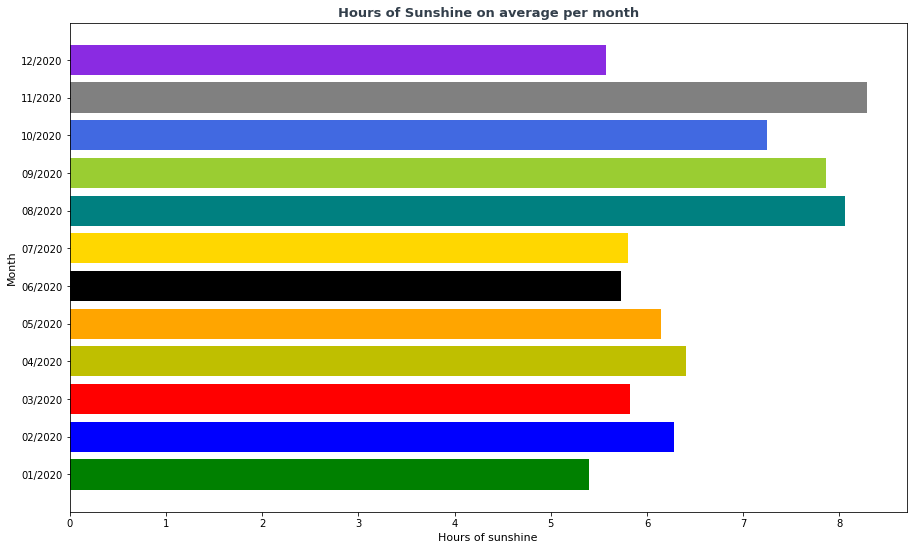

In [15]:
avg_sunshine_per_month = df['Sunshine (hours)'].groupby(pd.Grouper(freq="M")).mean() 
locs = np.array(np.arange(0,12))
months = np.unique(df.index.strftime('%m/%Y').tolist())
colormap = np.array(['g', 'b', 'r', 'y', 'orange', 'black', 'gold', 'teal', 
                     'yellowgreen', 'royalblue', 'gray', 'blueviolet'])

plt.figure(figsize=(15, 9))
plt.barh(months, avg_sunshine_per_month, color=colormap[locs])
plt.title('Hours of Sunshine on average per month', fontsize=13, fontweight='black', color = '#333F4B')
plt.xlabel('Hours of sunshine', fontsize=11)
plt.ylabel('Month', fontsize=11)
plt.show()

The months that the most hours of sunshine in 2020 were observed are between August and November.

## Preprocessing

We have already cleaned the dataset but there is some more work to be done. Machine Learning models cannot discern non-numeric data therefore we need to convert those columns to the right datatype. We define a function below which counts the number of columns that contain non-numeric values and at the same time saves their index in a list. This function would be even more useful in larger, higher dimensional datasets.

In [16]:
def count_str_columns(dataframe):
    str_cols, count = list(), 0
    for y, z in enumerate(dataframe):
        if any(isinstance(i, str) for i in dataframe.iloc[:,y]):
            str_cols.append(y)
            count+=1
    return count, str_cols

In [17]:
print(f'Total of non-numeric columns: {count_str_columns(df)[0]}')
print(f'Index of non-numeric columns: {count_str_columns(df)[1]}')

Total of non-numeric columns: 5
Index of non-numeric columns: [5, 7, 11, 12, 17]


Since this is not a high dimensional dataset we can cross check this by looking at the summary of the dataframe. There are 5 non-numeric columns, at the indices that we previously returned.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minimum temperature (°C)           366 non-null    float64
 1   Maximum temperature (°C)           366 non-null    float64
 2   Rainfall (mm)                      366 non-null    float64
 3   Evaporation (mm)                   366 non-null    float64
 4   Sunshine (hours)                   366 non-null    float64
 5   Direction of maximum wind gust     366 non-null    object 
 6   Speed of maximum wind gust (km/h)  366 non-null    float64
 7   Time of maximum wind gust          366 non-null    object 
 8   9am Temperature (°C)               366 non-null    float64
 9   9am relative humidity (%)          366 non-null    float64
 10  9am cloud amount (oktas)           366 non-null    float64
 11  9am wind direction                 366 

By looking at the said features, we notice that the '9am wind speed (km/h)' column should have been a continuous variable. We need to check if there are any discrepancies in the values of the column.

In [19]:
df.iloc[:, count_str_columns(df)[1]].head()

,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction
Date,,,,,
2020-01-01,SSW,23:28,S,11,ESE
2020-01-02,SSW,23:02,ESE,17,ESE
2020-01-03,NE,16:22,WNW,9,E
2020-01-04,S,22:23,E,9,E
2020-01-05,SSW,23:05,S,20,S


In [20]:
print(df.iloc[:, 12].unique(),'\n')
print('Instances of Calm:', df.iloc[:, 12][df.iloc[:, 12]=='Calm'].count())

['11' '17' '9' '20' '4' '15' '24' '13' 'Calm' '2' '22' '28' '6' '19' '7'
 '35' '43' 4 17 15 28 13 19 11 41 22 7 9 6 20 2 33 35 24 31 30 26 '39'
 '26' 43 '30'] 

Instances of Calm: 5


There is indeed a value called 'Calm' which is present in 5 different instances. We need to convert the instances of this value into numerical ones. Based on the Beaufort scale, wind speeds less than 2 km/h are classified as Calm. We will therefore convert the corresponding values to 1 km/h and subsequently convert all the values of this column into integers. 

For more information on the Beaufort scale:  https://en.wikipedia.org/wiki/Beaufort_scale

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
df.loc[(df.iloc[:,12]=='Calm'), ('9am wind speed (km/h)')] = 1
df['9am wind speed (km/h)'] = df.iloc[:,12].astype('int64')


ohe = OneHotEncoder(sparse=False)
df['3pm wind direction'] = ohe.fit_transform(np.array(df['3pm wind direction']).reshape(-1,1))
df['Direction of maximum wind gust '] = ohe.fit_transform(np.array(df['Direction of maximum wind gust ']).reshape(-1,1))
df['9am wind direction'] = ohe.fit_transform(np.array(df['9am wind direction']).reshape(-1,1))

## Model

Firstly, we define the target variable, y, and the independent variables, X.

In [30]:
X = df.drop(['Rain Tomorrow', 'Time of maximum wind gust'], axis=1)
y = df.iloc[:,-1].values

We split the dataset by setting the test size to 20%.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=12)

In [32]:
gnb = GaussianNB()
pred = gnb.fit(X_train, y_train)
y_pred = pred.predict(X_test)

In [33]:
gnb = GaussianNB()
cross_val_score(gnb, X, y, cv = 5).mean()

0.7433172898926323

In [34]:
accuracy_score(y_test, y_pred)

0.7567567567567568

In [37]:
df.iloc[:,-1].value_counts(normalize=True)

0.0    0.560109
1.0    0.439891
Name: Rain Tomorrow, dtype: float64